In [252]:
#Importamos las librerias necesarias para desarrollar el proyecto
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
import os
import plotly.graph_objs as go
from sklearn import linear_model

In [253]:
#Importamos el dataset que analizaremos en este ejercicio
cardano = pd.read_csv('ADA-USD.csv')
cardano.head(12)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440
5,2017-11-14,0.025797,0.026788,0.025342,0.026230,0.026230,3033290
6,2017-11-15,0.026116,0.027773,0.025261,0.026445,0.026445,6858800
7,2017-11-16,0.026583,0.028170,0.025654,0.027580,0.027580,4888130
8,2017-11-17,0.027143,0.027436,0.025184,0.025773,0.025773,3578870
9,2017-11-18,0.025597,0.027122,0.024748,0.026369,0.026369,2930550


In [254]:
#Miramos el número de lineas del dataset.
len(cardano)

1598

In [255]:
#Vemos toda la info del dataset, vemos que en todas las filas coincide el numero de non-null. Coincide con el mismo len que el del dataset
#No hay, por tanto, valores nulos en todo el dataset
cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [256]:
cardano.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,0.484421,0.506568,0.460876,0.485099,0.485099,1.207042e+09
std,0.670545,0.699241,0.640042,0.670711,0.670711,2.202736e+09
min,0.023954,0.025993,0.019130,0.023961,0.023961,2.930550e+06
25%,0.053023,0.055958,0.051386,0.053311,0.053311,6.421904e+07
50%,0.113265,0.118593,0.106945,0.113522,0.113522,1.851726e+08
75%,0.856796,0.903917,0.818793,0.858310,0.858310,1.374642e+09
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


In [257]:
cardano.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [258]:
#Vemos que la columna de Date está en formato object, procedemos a hacer la transformación
cardano['Date'] = cardano['Date'].astype('datetime64[ns]')

In [259]:
#Comprobamos
print(cardano.loc[1,'Date'])
cardano.head()

2017-11-10 00:00:00


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440


In [260]:
cardano['Date'].value_counts()

2017-11-09    1
2020-10-17    1
2020-10-15    1
2020-10-14    1
2020-10-13    1
             ..
2019-04-23    1
2019-04-22    1
2019-04-21    1
2019-04-20    1
2022-03-25    1
Name: Date, Length: 1598, dtype: int64

In [261]:
# Define the date format
# date_form = DateFormatter('%Y')
# ax.xaxis.set_major_formatter(date_form)

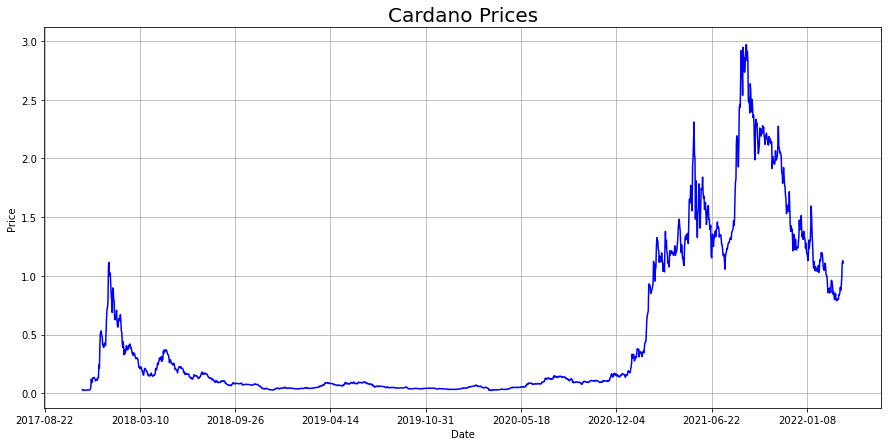

In [262]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(cardano['Date'], cardano['Close'], color='Blue')
date_form = DateFormatter('%Y')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.title('Cardano Prices', fontsize='20')
plt.grid()
plt.show()

In [263]:
#Precio máximo alcanzado
cardano.iloc[cardano['Close'].argmax()]

Date         2021-09-03 00:00:00
Open                    2.959315
High                    3.029436
Low                     2.907606
Close                   2.968239
Adj Close               2.968239
Volume                5244576777
Name: 1394, dtype: object

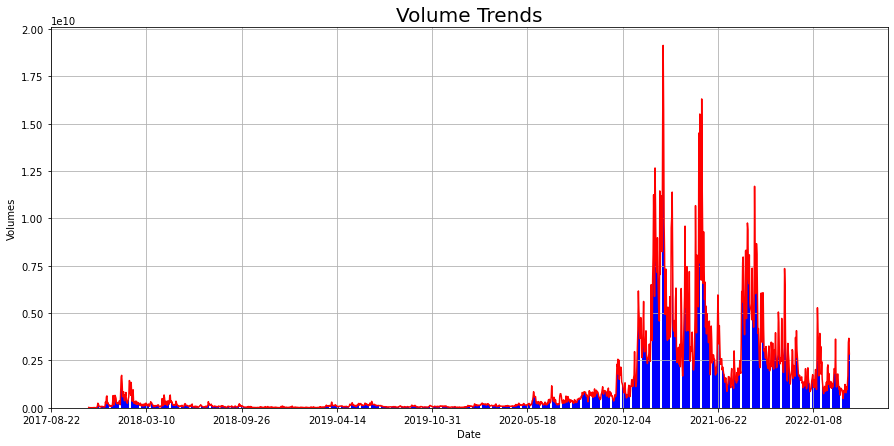

In [264]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(pd.to_datetime(cardano['Date']), cardano['Volume'], color='Blue')
ax.plot(pd.to_datetime(cardano['Date']), cardano['Volume'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Volumes')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [265]:
cardano['Market Cap'] = cardano['Open'] * cardano['Volume']

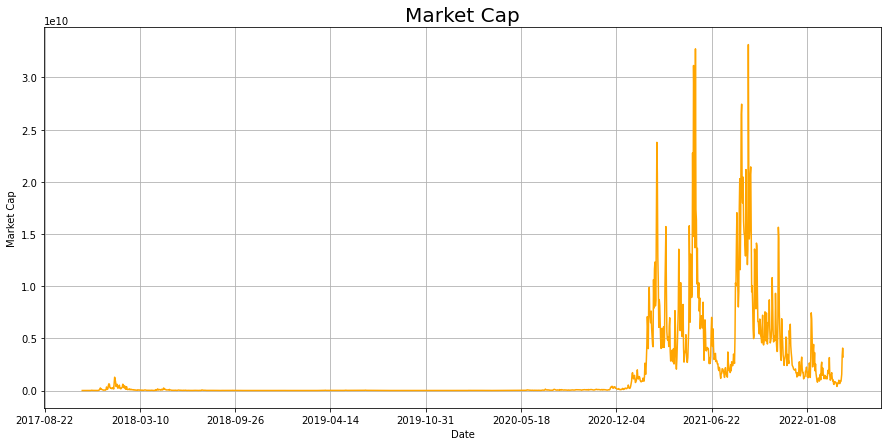

In [266]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(cardano['Date'], cardano['Market Cap'], color='Orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Market Cap')
plt.title('Market Cap', fontsize='20')
plt.grid()
plt.show()

In [267]:
#Market Cap máximo alcanzado
cardano.iloc[cardano['Market Cap'].argmax()]

Date          2021-09-07 00:00:00
Open                     2.832807
High                     2.872511
Low                      2.040953
Close                    2.502491
Adj Close                2.502491
Volume                11700337851
Market Cap     33144798966.677753
Name: 1398, dtype: object

In [268]:
cardano['vol'] = (cardano['Close'] / cardano['Close'].shift(1))

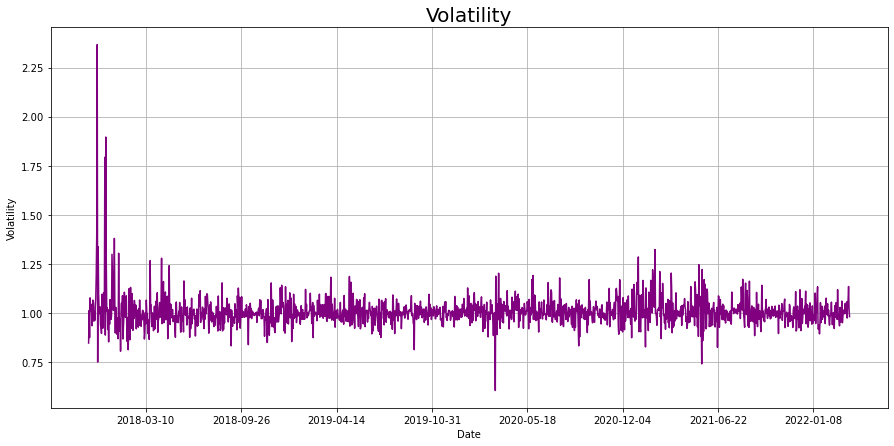

In [269]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(cardano['Date'], cardano['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
plt.title('Volatility', fontsize='20')
plt.grid()
plt.show()

<AxesSubplot:>

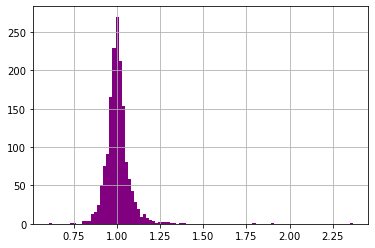

In [270]:
cardano['vol'].hist(bins=100, color='purple')

In [271]:
cardano['Cumulative Return'] = (cardano['vol']).cumprod()

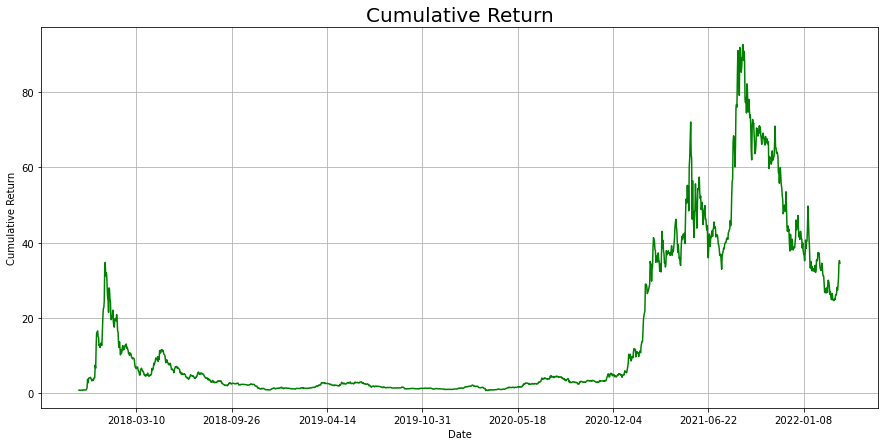

In [272]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(cardano['Date'], cardano['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.title('Cumulative Return', fontsize='20')
plt.grid()
plt.show()

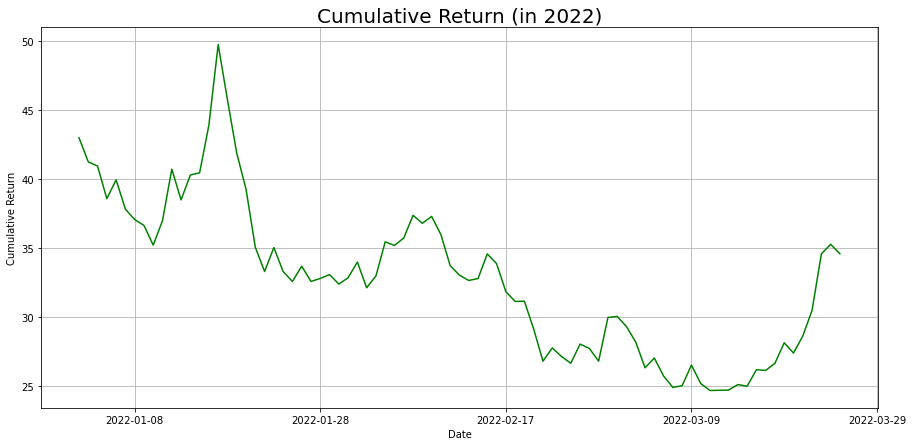

In [273]:
year_2022_ada = cardano[(cardano['Date'] > '2022-01')]
year_2022_ada = year_2022_ada.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
year_2022_ada['Date'] = pd.to_datetime(year_2022_ada['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(year_2022_ada['Date'], year_2022_ada['Cumulative Return'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.grid()
plt.title('Cumulative Return (in 2022)', fontsize='20')
plt.show()

In [274]:
cardano["returns"] = (cardano["Close"]/cardano["Close"].shift(1)) - 1

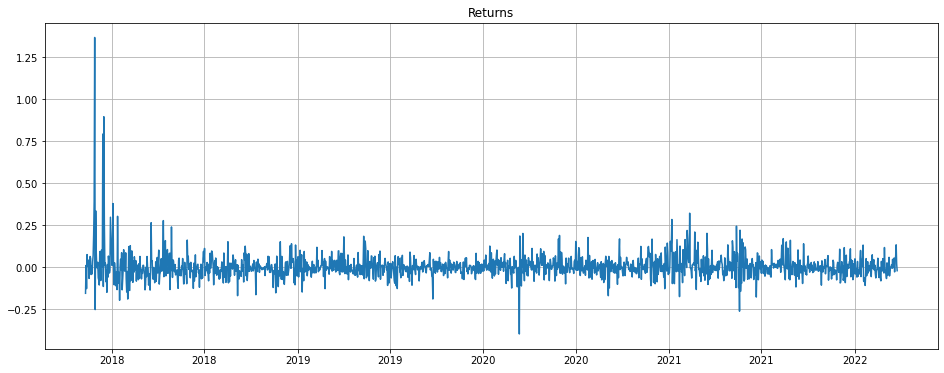

In [275]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cardano.Date, cardano['returns'])
ax.xaxis.set_major_formatter(date_form)
plt.title('Returns')
plt.grid()
plt.show()

<AxesSubplot:>

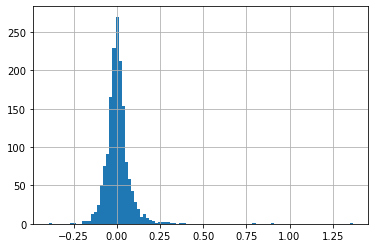

In [276]:
cardano["returns"].hist(bins=100)

In [277]:
cardano["returns"].describe()

count    1597.000000
mean        0.004830
std         0.078396
min        -0.395672
25%        -0.030334
50%         0.000592
75%         0.031112
max         1.366810
Name: returns, dtype: float64

<AxesSubplot:>

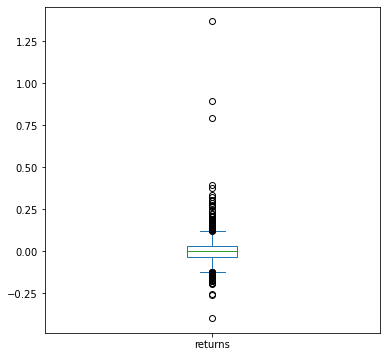

In [278]:
cardano["returns"].plot(kind = "box", figsize = (6,6))

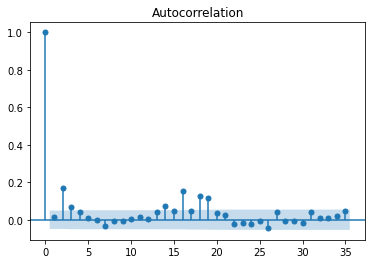

In [279]:
acf_plot = plot_acf(cardano.returns.dropna(), lags=35)

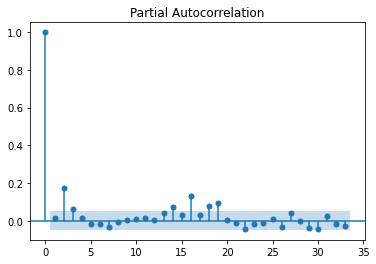

In [280]:
pacf_plot = plot_pacf(cardano.returns.dropna())

In [281]:
cardano.describe() 

,Open,High,Low,Close,Adj Close,Volume,Market Cap,vol,Cumulative Return,returns
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1.598000e+03,1597.000000,1597.000000,1597.000000
mean,0.484421,0.506568,0.460876,0.485099,0.485099,1.207042e+09,1.592856e+09,1.004830,15.143135,0.004830
std,0.670545,0.699241,0.640042,0.670711,0.670711,2.202736e+09,3.822174e+09,0.078396,20.928618,0.078396
min,0.023954,0.025993,0.019130,0.023961,0.023961,2.930550e+06,7.501329e+04,0.604328,0.747543,-0.395672
25%,0.053023,0.055958,0.051386,0.053311,0.053311,6.421904e+07,3.669364e+06,0.969666,1.665024,-0.030334
50%,0.113265,0.118593,0.106945,0.113522,0.113522,1.851726e+08,2.462412e+07,1.000592,3.548872,0.000592
75%,0.856796,0.903917,0.818793,0.858310,0.858310,1.374642e+09,1.178594e+09,1.031112,26.778617,0.031112
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10,3.314480e+10,2.366810,92.604093,1.366810


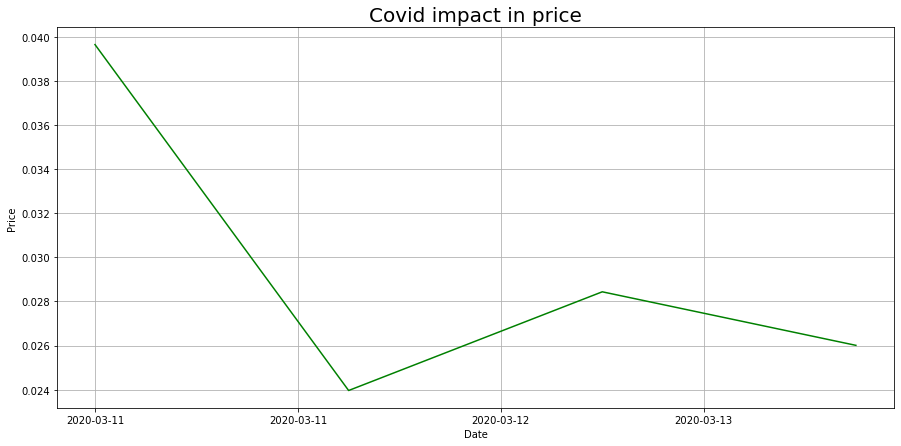

In [282]:
#Para ver el impacto de la crisis del Covid, partimos el dataset para analizar esas fechas en detalle:
#El 13 de marzo de 2020 se decreta el lockdown en la mayoria de paises del mundo. Para ver su impacto, observamos la evolucion del precio desde el 10 al 15 de marzo de 2020

covid = cardano[(cardano['Date'] > '2020-03-10') & ( cardano['Date'] <'2020-03-15')]
covid = covid.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(covid['Date'], covid['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Covid impact in price', fontsize='20')
plt.show()

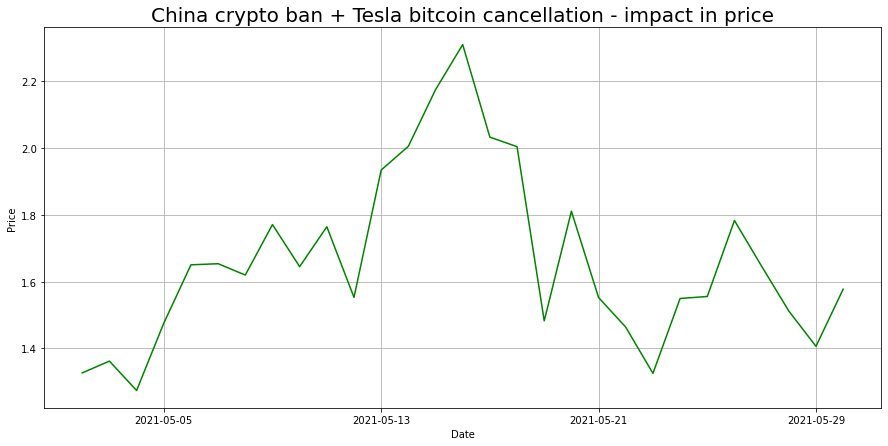

In [283]:
#En mayo de 2021, el Gobierno Chino anunció que declararia como ilegales todas las transacciones con criptomonedas. Ademas, el 13 de mayo de mismo año, Tesla anuncia que dejara de ser posible pagar en BTC por razones climaticas 
#observamos el impacto de este factor externo en el valor de cardano
china = cardano[(cardano['Date'] > '2021-05-01') & ( cardano['Date'] <'2021-05-31')]
china = china.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
china['Date'] = pd.to_datetime(china['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(china['Date'], china['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('China crypto ban + Tesla bitcoin cancellation - impact in price', fontsize='20')
plt.show()

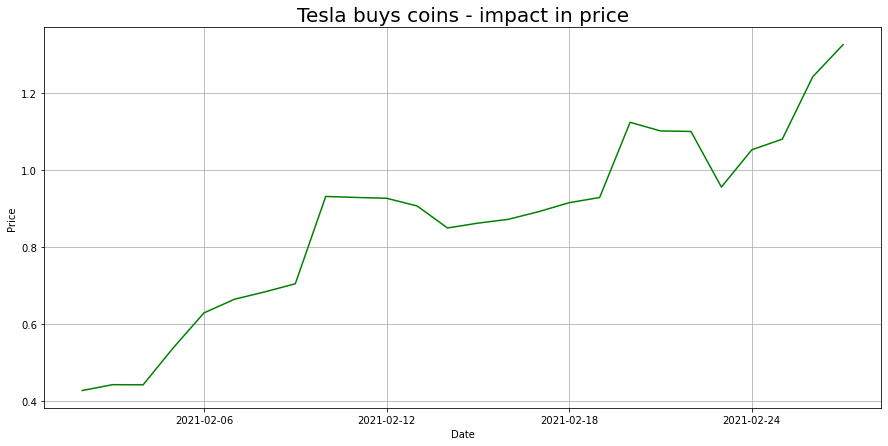

In [284]:
#En febrero de 2021, Elon Musk anuncia que Tesla habia comprado criptomonedas
#observamos el impacto de este factor externo en el valor de cardano
elon = cardano[(cardano['Date'] > '2021-02-01') & ( cardano['Date'] <'2021-02-28')]
elon = elon.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon['Date'] = pd.to_datetime(elon['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon['Date'], elon['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Tesla buys coins - impact in price', fontsize='20')
plt.show()

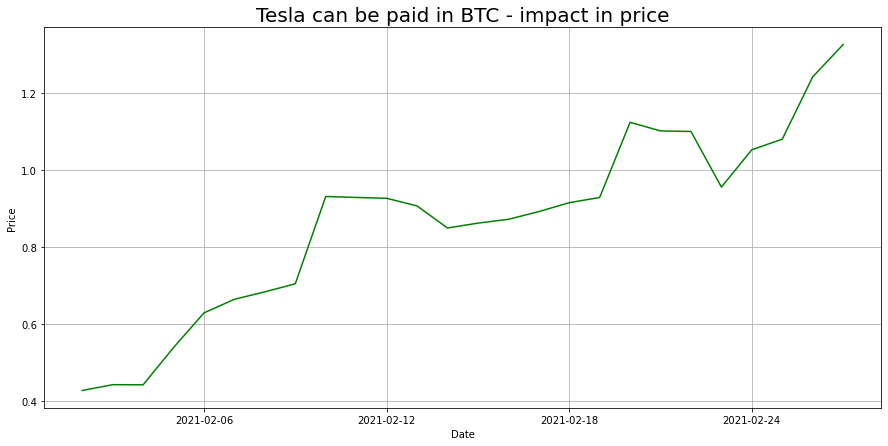

In [285]:
#En junio de 2021, Elon Musk anuncia que se puede pagar Tesla con Bitcoin
#observamos el impacto de este factor externo en el valor de cardano
elon2 = cardano[(cardano['Date'] > '2021-02-01') & ( cardano['Date'] <'2021-02-28')]
elon2 = elon2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon2['Date'] = pd.to_datetime(elon2['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon2['Date'], elon2['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Tesla can be paid in BTC - impact in price', fontsize='20')
plt.show()

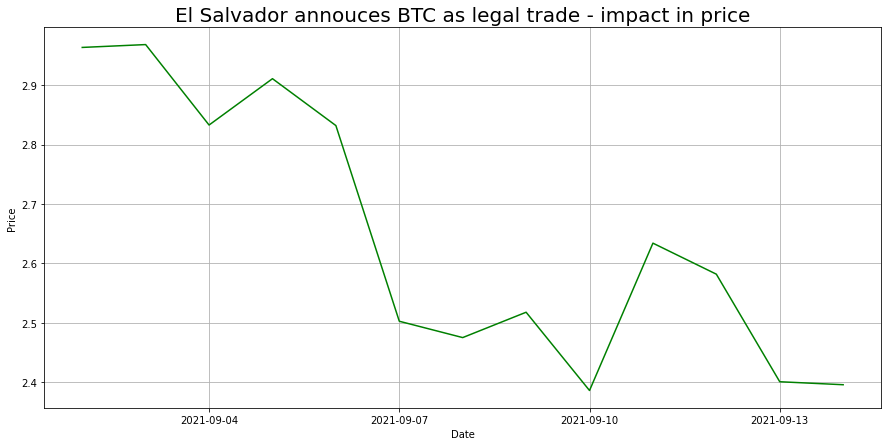

In [286]:
#En septiembre de 2021, El Salvador anuncia que convierte el Bitcoin en moneda de cambio oficial y compra BTC
#observamos el impacto de este factor externo en el valor de cardano
elon2 = cardano[(cardano['Date'] > '2021-09-01') & ( cardano['Date'] <'2021-09-15')]
elon2 = elon2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon2['Date'] = pd.to_datetime(elon2['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon2['Date'], elon2['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('El Salvador annouces BTC as legal trade - impact in price', fontsize='20')
plt.show()

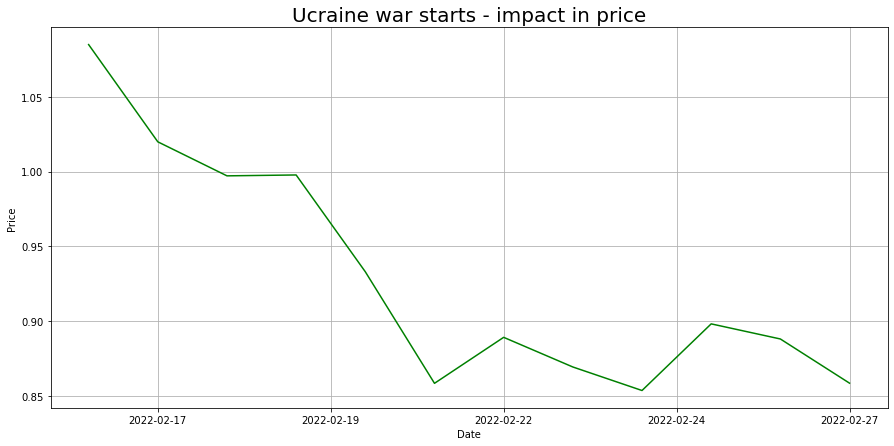

In [287]:
#En febero de 2022, estalla la guerra de Ucrania
#observamos el impacto de este factor externo en el valor de cardano
elon2 = cardano[(cardano['Date'] > '2022-02-15') & ( cardano['Date'] <'2022-02-28')]
elon2 = elon2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon2['Date'] = pd.to_datetime(elon2['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon2['Date'], elon2['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Ucraine war starts - impact in price', fontsize='20')
plt.show()

In [288]:
trace1 = go.Scatter(
    x=cardano['Date'],
    y=cardano['Open'].astype(float),
    mode='lines',
    name='Open Price')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Cardano Prices',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_plot = list([trace1])
fig = dict(data=data_plot, layout=layout)
import plotly.io as pio
pio.templates["blue"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#2986cc']
    )
)
pio.templates.default = 'blue'
pio.show(fig)

In [289]:
trace2 = go.Scatter(
    x=cardano['Date'],
    y=cardano['Volume'].astype(float),
    mode='lines',
    name='Volume in USD')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Cardano Volume',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_plot2 = list([trace2])
fig = dict(data=data_plot2, layout=layout)
import plotly.io as pio
pio.templates["green"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#8fce00']
    )
)
pio.templates.default = 'green'
pio.show(fig)

In [290]:
cardano['Market Cap'] = cardano['Open'] * cardano['Volume']

In [291]:
trace3 = go.Scatter(
    x=cardano['Date'],
    y=cardano['Market Cap'].astype(float),
    mode='lines',
    name='Market Cap')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Cardano Market Cap',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_plot3 = list([trace3])
fig = dict(data=data_plot3, layout=layout)
import plotly.io as pio
pio.templates["orange"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#ffa500 ']
    )
)
pio.templates.default = 'orange'
pio.show(fig)

In [292]:
cardano['volatility'] = (cardano['Close'] / cardano['Close'].shift(1))

In [293]:
trace6 = go.Scatter(
    x=cardano['Date'],
    y=cardano['volatility'].astype(float),
    mode='lines',
    name='volatility')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Cardano Volatility',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_5_plot = list([trace6])
fig = dict(data=data_5_plot, layout=layout)
import plotly.io as pio
pio.templates["purple"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#800080  ']
    )
)
pio.templates.default = 'purple'
pio.show(fig)

In [294]:
cardano['Cumulative Return'] = (cardano['volatility']).cumprod()
trace7 = go.Scatter(
    x=cardano['Date'],
    y=cardano['Cumulative Return'].astype(float),
    mode='lines',
    name='Cumulative Return')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Cardano Cumulative Return',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_6_plot = list([trace7])
fig = dict(data=data_6_plot, layout=layout)
import plotly.io as pio
pio.templates["yellow"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#ffd966']
    )
)
pio.templates.default = 'yellow'
pio.show(fig)

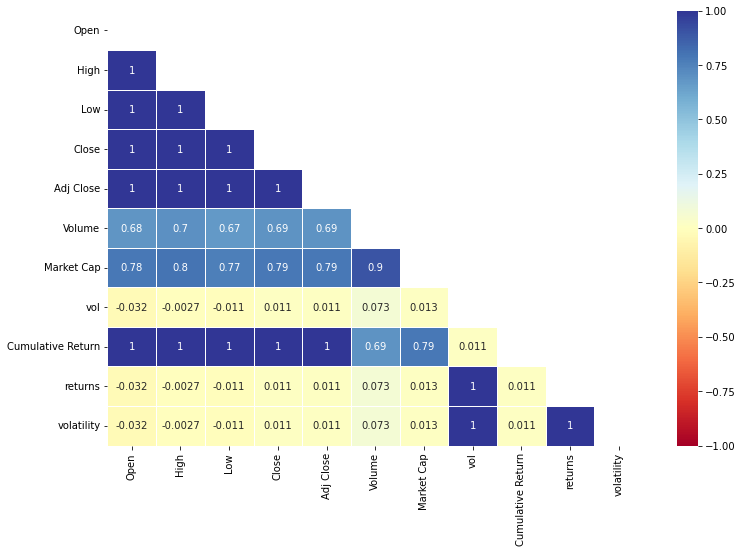

In [295]:
#Matrix de coeficientes de correlación
corr=cardano.corr()# corr es una matriz diagonalmente simétrica 
mask = np.triu(np.ones_like(corr))# m# mask es una matriz True/False simétrica sobre la diagonal principal
plt.figure(figsize=(12,8))# # Asignar mask para trazar la mitad del gráfico
sns.heatmap(data=corr,mask=mask,cmap='RdYlBu',vmax=1,vmin=-1,annot=True,linecolor='white',linewidths=0.5)
plt.savefig('ma_tran_tuong_quan.png')

In [296]:
#Linear regression model

from datetime import datetime
l_rev_date_reg = linear_model.LinearRegression()
ada_log_reg = cardano[cardano['Close'] > 0]
ada_log_reg['Date'] = ada_log_reg['Date'].map(datetime.toordinal)
X = np.array(ada_log_reg['Date']).reshape(-1,1)
y = np.log(ada_log_reg['Close'])
l_rev_date_reg.fit(X, y)

LinearRegression()

In [297]:
print('Coefficient: {:e}'.format(l_rev_date_reg.coef_[0]))
print('Intercept: {:e}'.format(l_rev_date_reg.intercept_))
print('R^2: {:.4f}'.format(l_rev_date_reg.score(X,y)))

Coefficient: 1.750018e-03
Intercept: -1.292237e+03
R^2: 0.3317


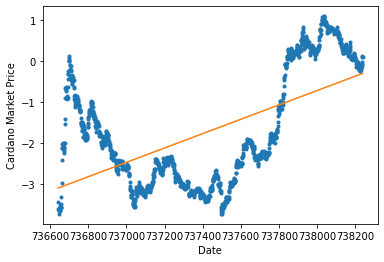

In [298]:
plt.plot(ada_log_reg['Date'],np.log(ada_log_reg['Close']),'.')
plt.plot(ada_log_reg['Date'],l_rev_date_reg.predict(X), '-')
plt.xlabel('Date')
plt.ylabel('Cardano Market Price')
plt.show()

In [299]:
#Logaritmic regression model

from scipy.optimize import curve_fit
import numpy as np
def funct(x,p1,p2):
    return p1*np.log(x)+p2

In [300]:
xdata = np.array([x+1 for x in range(len(cardano))])
ydata = np.log(cardano['Close'])

In [301]:
popt, pcov = curve_fit(funct, xdata, ydata,p0=(3.0,-10))

fittedydata = funct(xdata,popt[0],popt[1])

In [302]:
print(popt, pcov)

[ 0.41994658 -4.38228814] [[ 0.0011471  -0.00731778]
 [-0.00731778  0.04780596]]


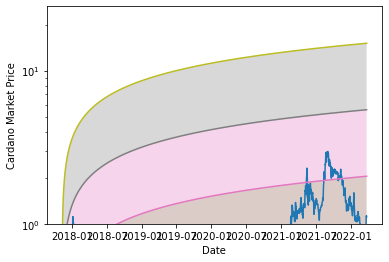

In [303]:
plt.semilogy(cardano['Date'],cardano['Close'])
for i in range(-3,5):
    plt.plot(cardano['Date'],np.exp(fittedydata+i))
    plt.fill_between(cardano['Date'],np.exp(fittedydata+i-1),np.exp(fittedydata+i),alpha=0.3)
plt.ylim(bottom=1)
plt.xlabel('Date')
plt.ylabel('Cardano Market Price')
plt.show()

In [304]:
#LSTM Model

import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [305]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(cardano['Close'].values.reshape(-1,1))



In [306]:
prediction_days = 60

In [307]:
x_train,y_train=[],[]

In [308]:
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [309]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [310]:
#Neural Network creacion
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [311]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
49/49 [==============================] - 5s 98ms/step - loss: 0.0121
Epoch 2/25
49/49 [==============================] - 5s 106ms/step - loss: 0.0037
Epoch 3/25
49/49 [==============================] - 5s 108ms/step - loss: 0.0026
Epoch 4/25
49/49 [==============================] - 5s 104ms/step - loss: 0.0026
Epoch 5/25
49/49 [==============================] - 5s 104ms/step - loss: 0.0023
Epoch 6/25
49/49 [==============================] - 5s 106ms/step - loss: 0.0023
Epoch 7/25
49/49 [==============================] - 5s 108ms/step - loss: 0.0019
Epoch 8/25
49/49 [==============================] - 5s 109ms/step - loss: 0.0020
Epoch 9/25
49/49 [==============================] - 5s 109ms/step - loss: 0.0018
Epoch 10/25
49/49 [==============================] - 5s 108ms/step - loss: 0.0020
Epoch 11/25
49/49 [==============================] - 5s 107ms/step - loss: 0.0021
Epoch 12/25
49/49 [==============================] - 5s 105ms/step - loss: 0.0022
Epoch 13/25
49/49 [=======

In [312]:
test_start=dt.datetime(2022,5,1)
test_end = dt.datetime.now()
test_data=cardano
actual_prices=test_data['Close'].values

In [313]:
total_dataset=pd.concat((cardano['Close'], test_data['Close']), axis=0)

In [314]:
model_imputs=total_dataset [(len(total_dataset)) - (len(test_data)) - prediction_days:].values

In [315]:
model_imputs=model_imputs.reshape(-1,1)
model_imputs=scaler.fit_transform(model_imputs)

In [316]:
x_test= []

In [317]:
for x in  range(prediction_days, len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x, 0])

In [318]:
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [319]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

In [320]:
crypto_currency = 'ADA'

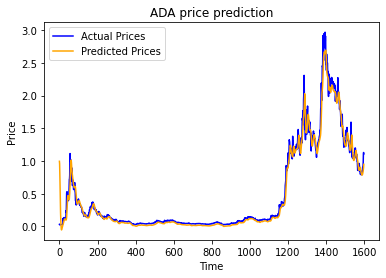

In [321]:
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(prediction_prices, color = 'orange', label= 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [322]:
#Prediction Next Day
real_data = [model_imputs[len(model_imputs) + 1 - prediction_days:len(model_imputs) +1]]
real_data = np.array(real_data)
real_data = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[0.9955335 ]
 [0.9591113 ]
 [0.84536606]
 ...
 [0.8708081 ]
 [0.9047296 ]
 [0.9490554 ]]


In [323]:
#Prediction future
future_day= 38

x_train,y_train=[],[]

for x in range(prediction_days,len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [324]:
#Create Neural Network
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
47/47 [==============================] - 5s 97ms/step - loss: 0.0216
Epoch 2/25
47/47 [==============================] - 5s 100ms/step - loss: 0.0118
Epoch 3/25
47/47 [==============================] - 5s 99ms/step - loss: 0.0122
Epoch 4/25
47/47 [==============================] - 5s 100ms/step - loss: 0.0122
Epoch 5/25
47/47 [==============================] - 5s 104ms/step - loss: 0.0115
Epoch 6/25
47/47 [==============================] - 5s 104ms/step - loss: 0.0115
Epoch 7/25
47/47 [==============================] - 5s 103ms/step - loss: 0.0122
Epoch 8/25
47/47 [==============================] - 5s 104ms/step - loss: 0.0115
Epoch 9/25
47/47 [==============================] - 5s 102ms/step - loss: 0.0116
Epoch 10/25
47/47 [==============================] - 5s 103ms/step - loss: 0.0107
Epoch 11/25
47/47 [==============================] - 5s 102ms/step - loss: 0.0108
Epoch 12/25
47/47 [==============================] - 5s 104ms/step - loss: 0.0110
Epoch 13/25
47/47 [========

In [ ]:
test_start=dt.datetime(2019,1,1)
test_end = dt.datetime.now()
test_data=cardano
actual_prices=test_data['Close'].values

In [ ]:
total_dataset=pd.concat((cardano['Close'], test_data['Close']), axis=0)

In [ ]:
model_imputs=total_dataset [(len(total_dataset)) - (len(test_data)) - prediction_days:].values
model_imputs=model_imputs.reshape(-1,1)
model_imputs=scaler.fit_transform(model_imputs)

In [ ]:
x_test= []

for x in  range(prediction_days, len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x, 0])
    
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

In [ ]:
crypto_currency = 'ADA'

In [ ]:
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(prediction_prices, color = 'orange', label= 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()